# DNSC 4211 Semester-Long Project

The following contains all of the code used for the data analysis of my project. The code is broken up into sections for ease of use.

## 1. Preparation

**In this section, I:**
1. Imported all of the necessary Python packages for the project
2. Read in the `Fuel_Consumption_2000-2022.csv` dataset (Kaggle.com) used
3. Initiated the cleaning process by making data uniform

In [8]:
#- Importing Packages
import pandas as pd
import numpy as np
from scipy import stats
import os
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor

In [9]:
#- Dataset read-in from Import (copy provided with submission)
df = pd.read_csv('Fuel_Consumption_2000-2022.csv')

In [10]:
#- Initial dataset cleaning
df['MAKE'] = df['MAKE'].str.upper()
df['MODEL'] = df['MODEL'].str.upper()
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].str.upper()
df.sample(5)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
13498,2014,DODGE,CHALLENGER SRT (MDS),MID-SIZE,6.4,8,A5,Z,15.0,8.7,12.2,23,281
16753,2017,CHEVROLET,TRAX,SUV - SMALL,1.4,4,AS6,X,9.3,7.2,8.3,34,194
21288,2021,MAZDA,MAZDA3 5-DOOR (SIL),MID-SIZE,2.0,4,M6,X,8.7,6.6,7.8,36,181
14456,2015,CADILLAC,ATS AWD,COMPACT,3.6,6,AS6,X,12.8,8.9,11.0,26,253
11888,2012,MITSUBISHI,RVR,SUV,2.0,4,AV,X,8.6,6.6,7.7,37,177


## 2. Pre-Processing

This section is designated to getting the dataset ready for statistical analysis. I cleaned up a major formatting issue, and added a categorical bucket column for vehicle classes. At the end of the section, the finalized dataset is downloadable.

In [13]:
#- Understanding the data:
print('Vehicle Classes:')
print(df['VEHICLE CLASS'].unique())

print('Vehicle Manufacturers:')
print(df['MAKE'].unique())

Vehicle Classes:
['COMPACT' 'MID-SIZE' 'SUBCOMPACT' 'STATION WAGON - MID-SIZE'
 'MINICOMPACT' 'TWO-SEATER' 'STATION WAGON - SMALL' 'FULL-SIZE' 'SUV'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD'
 'PICKUP TRUCK - SMALL' 'MINIVAN' 'SUV - STANDARD'
 'SPECIAL PURPOSE VEHICLE' 'SUV - SMALL' 'SUV: SMALL'
 'STATION WAGON: SMALL' 'SUV: STANDARD' 'PICKUP TRUCK: SMALL'
 'PICKUP TRUCK: STANDARD' 'VAN: PASSENGER' 'STATION WAGON: MID-SIZE']
Vehicle Manufacturers:
['ACURA' 'AUDI' 'BMW' 'BUICK' 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DAEWOO'
 'DODGE' 'FERRARI' 'FORD' 'GMC' 'HONDA' 'HYUNDAI' 'INFINITI' 'ISUZU'
 'JAGUAR' 'JEEP' 'KIA' 'LAND ROVER' 'LEXUS' 'LINCOLN' 'MAZDA'
 'MERCEDES-BENZ' 'NISSAN' 'OLDSMOBILE' 'PLYMOUTH' 'PONTIAC' 'PORSCHE'
 'SAAB' 'SATURN' 'SUBARU' 'SUZUKI' 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'BENTLEY'
 'ROLLS-ROYCE' 'MASERATI' 'MINI' 'MITSUBISHI' 'SMART' 'HUMMER'
 'ASTON MARTIN' 'LAMBORGHINI' 'BUGATTI' 'SCION' 'FIAT' 'RAM' 'SRT'
 'ALFA ROMEO' 'GENESIS']


In [14]:
#- Cleaning up the vehicle class formatting:
class_mapping = {
    'SUV: STANDARD': 'SUV: STANDARD',
    'SUV - STANDARD': 'SUV: STANDARD',
    'SUV: SMALL': 'SUV: SMALL',
    'SUV - SMALL': 'SUV: SMALL',
    'STATION WAGON: SMALL': 'STATION WAGON: SMALL',
    'STATION WAGON - SMALL': 'STATION WAGON: SMALL',
    'STATION WAGON: MID-SIZE': 'STATION WAGON: STANDARD',
    'STATION WAGON - MID-SIZE': 'STATION WAGON: STANDARD',
    'PICKUP TRUCK: SMALL': 'PICKUP TRUCK: SMALL',
    'PICKUP TRUCK - SMALL': 'PICKUP TRUCK: SMALL',
    'PICKUP TRUCK: STANDARD': 'PICKUP TRUCK: STANDARD',
    'PICKUP TRUCK - STANDARD': 'PICKUP TRUCK: STANDARD',
    'VAN: CARGO': 'VAN: CARGO',
    'VAN - CARGO': 'VAN: CARGO',
    'VAN: PASSENGER': 'VAN: PASSENGER',
    'VAN - PASSENGER': 'VAN: PASSENGER',
    'MINIVAN': 'VAN: MINI',
    'COMPACT': 'SEDAN: COMPACT',
    'MID-SIZE': 'SEDAN: MID-SIZE',
    'SUBCOMPACT': 'SEDAN: SUBCOMPACT',
    'MINICOMPACT': 'SEDAN: MINI',
    'TWO-SEATER': 'SEDAN: TWO-SEATER',
    'FULL-SIZE': 'SEDAN: FULL-SIZE',
    'SPECIAL PURPOSE VEHICLE':  'SPV'
}

df['VEHICLE CLASS'] = df['VEHICLE CLASS'].str.upper().replace(class_mapping)

print(df['VEHICLE CLASS'].unique())

['SEDAN: COMPACT' 'SEDAN: MID-SIZE' 'SEDAN: SUBCOMPACT'
 'STATION WAGON: STANDARD' 'SEDAN: MINI' 'SEDAN: TWO-SEATER'
 'STATION WAGON: SMALL' 'SEDAN: FULL-SIZE' 'SUV' 'VAN: CARGO'
 'VAN: PASSENGER' 'PICKUP TRUCK: STANDARD' 'PICKUP TRUCK: SMALL'
 'VAN: MINI' 'SUV: STANDARD' 'SPV' 'SUV: SMALL']


In [15]:
#- Adding a categorical column to separate into class buckets:
df['CLASS NUMERIC'] = 3
df.loc[df['VEHICLE CLASS'].str.contains('SUV'), 'CLASS NUMERIC'] = 2
df.loc[df['VEHICLE CLASS'].str.contains('SEDAN'), 'CLASS NUMERIC'] = 1
df.loc[df['VEHICLE CLASS'].str.contains('STATION WAGON'), 'CLASS NUMERIC'] = 1
df.sample(10)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,CLASS NUMERIC
13885,2014,LINCOLN,MKZ AWD,SEDAN: MID-SIZE,3.7,6,AS6,X,11.6,7.8,9.9,29,228,1
19512,2019,PORSCHE,911 CARRERA 4 GTS CABRIOLET,SEDAN: MINI,3.0,6,M7,Z,12.9,9.1,11.2,25,260,1
241,2000,FORD,EXPLORER SOHC 4X4,SUV,4.0,6,A5,X,15.0,10.8,13.1,22,301,2
14393,2015,BMW,ACTIVEHYBRID 7L,SEDAN: FULL-SIZE,3.0,6,AS8,Z,10.6,7.7,9.3,30,214,1
16488,2016,VOLVO,XC60 T6 AWD,SUV: SMALL,2.0,4,AS8,Z,11.8,9.1,10.6,27,247,2
19784,2020,BMW,M2 COMPETITION,SEDAN: SUBCOMPACT,3.0,6,M6,Z,13.4,9.6,11.7,24,273,1
6194,2007,GMC,CANYON,PICKUP TRUCK: STANDARD,3.7,5,A4,X,13.6,9.3,11.7,24,269,3
13695,2014,HONDA,ODYSSEY,VAN: MINI,3.5,6,A6,X,10.9,7.1,9.2,31,212,3
981,2001,HONDA,CR-V,SUV,2.0,4,M5,X,11.0,8.9,10.1,28,232,2
19212,2019,KIA,NIRO,STATION WAGON: SMALL,1.6,4,AM6,X,4.6,5.1,4.8,59,114,1


In [ ]:
#- Downloading cleaned dataset:
df.to_csv('clean df.csv')

## 3. Beginner Data Analysis

This section contains all of the initial data analysis performed:
1. Descriptive statistics
2. ANOVA
  * F-Scoring
3. Simple Linear Regression
4. Summary tables (fuel consumption & emissions)

In [16]:
#- Basic Descriptive Statistics
df.groupby('CLASS NUMERIC')['FUEL CONSUMPTION'].describe()

,count,mean,std,min,25%,50%,75%,max
CLASS NUMERIC,,,,,,,,
1,13170.0,11.743257,3.187726,3.5,9.6,11.50,13.2,30.6
2,5518.0,13.279050,3.225865,5.4,10.8,12.75,15.4,26.7
3,3868.0,15.501887,3.258014,5.6,13.3,15.10,16.9,30.6


In [17]:
#- ANOVA test
sedan_eff = df[df['CLASS NUMERIC'] == 1]['FUEL CONSUMPTION']
suv_eff = df[df['CLASS NUMERIC'] == 2]['FUEL CONSUMPTION']
other_eff = df[df['CLASS NUMERIC'] == 3]['FUEL CONSUMPTION']

f_test, pvalue = stats.f_oneway(sedan_eff, suv_eff, other_eff)

#- F-critical (ChatGPT helped, I didn't fully understand scipy):
alpha = 0.05
df1 = len(df['CLASS NUMERIC'].unique()) - 1
df2 = len(df) - len(df['CLASS NUMERIC'].unique())
f_critical = stats.f.ppf(1 - alpha, df1, df2)

print(f"F Critical: {f_critical}")
print(f"F Test: {f_test}")

F Critical: 2.9961302341858693
F Test: 2144.865616395275


In [18]:
#- Simple Linear Regression
smOLS = sm.OLS(df["FUEL CONSUMPTION"], df["CLASS NUMERIC"]).fit()
print(smOLS.summary())

                                 OLS Regression Results                                
Dep. Variable:       FUEL CONSUMPTION   R-squared (uncentered):                   0.836
Model:                            OLS   Adj. R-squared (uncentered):              0.836
Method:                 Least Squares   F-statistic:                          1.151e+05
Date:                Tue, 10 Dec 2024   Prob (F-statistic):                        0.00
Time:                        00:28:04   Log-Likelihood:                         -69861.
No. Observations:               22556   AIC:                                  1.397e+05
Df Residuals:                   22555   BIC:                                  1.397e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [19]:
#-- Fuel consumption of passenger cars comparison
filtered_df = df[df['CLASS NUMERIC'].isin([1, 2])]

# Making a summary table
summary = filtered_df.groupby('CLASS NUMERIC').agg(
    total_fuel=('FUEL CONSUMPTION', 'sum'),
    sample_count=('FUEL CONSUMPTION', 'count')
)

summary['avg_fuel_per_sample'] = summary['total_fuel'] / summary['sample_count']

class_1_avg = summary.loc[1, 'avg_fuel_per_sample'] if 1 in summary.index else 0
class_2_avg = summary.loc[2, 'avg_fuel_per_sample'] if 2 in summary.index else 0

perc = 100*(abs(class_1_avg - class_2_avg))/((class_1_avg + class_2_avg)/2)

print(summary)
print(perc)

               total_fuel  sample_count  avg_fuel_per_sample
CLASS NUMERIC                                               
1                154658.7         13170            11.743257
2                 73273.8          5518            13.279050
12.27539034892904


In [20]:
#-- Emissions of passenger cars comparison
filtered_df = df[df['CLASS NUMERIC'].isin([1, 2])]

# Making a summary table
summary = filtered_df.groupby('CLASS NUMERIC').agg(
    total_fuel=('EMISSIONS', 'sum'),
    sample_count=('EMISSIONS', 'count')
)

summary['avg_fuel_per_sample'] = summary['total_fuel'] / summary['sample_count']

class_1_avg = summary.loc[1, 'avg_fuel_per_sample'] if 1 in summary.index else 0
class_2_avg = summary.loc[2, 'avg_fuel_per_sample'] if 2 in summary.index else 0

perc = 100*(abs(class_1_avg - class_2_avg))/((class_1_avg + class_2_avg)/2)

print(summary)
print(perc)

               total_fuel  sample_count  avg_fuel_per_sample
CLASS NUMERIC                                               
1                 3044083         13170           231.137661
2                 1453668          5518           263.441102
13.063011556714494


## 4. Visualizations

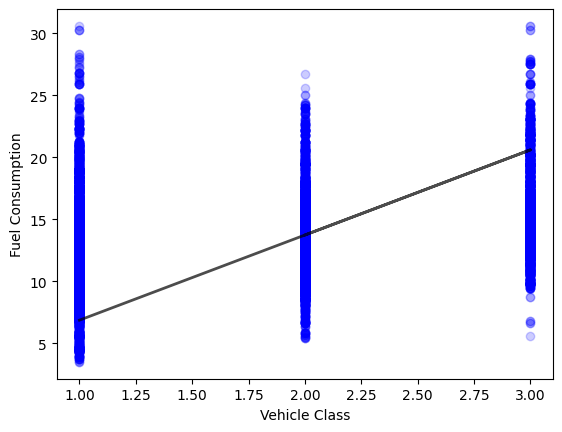

In [21]:
#- Simple Linear Regression graph
ax = plt.axes()
ax.scatter(df["CLASS NUMERIC"], df["FUEL CONSUMPTION"], color='b', alpha=0.20)
ax.plot(df["CLASS NUMERIC"], smOLS.predict(), color='black', alpha=0.70, linewidth=2)
ax.set_xlabel('Vehicle Class')
ax.set_ylabel('Fuel Consumption')

plt.show()

0.9191005620020062


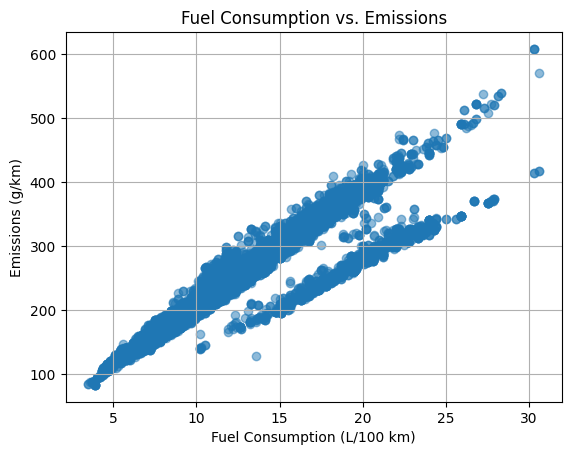

In [22]:
#- Correlation matrix & Heatmap

corr, p_value = stats.pearsonr(df['FUEL CONSUMPTION'], df['EMISSIONS'])
print(corr)

plt.scatter(df['FUEL CONSUMPTION'], df['EMISSIONS'], alpha=0.5)
plt.title('Fuel Consumption vs. Emissions')
plt.xlabel('Fuel Consumption (L/100 km)')  # Replace with the actual unit
plt.ylabel('Emissions (g/km)')  # Replace with the actual unit
plt.grid()
plt.show()

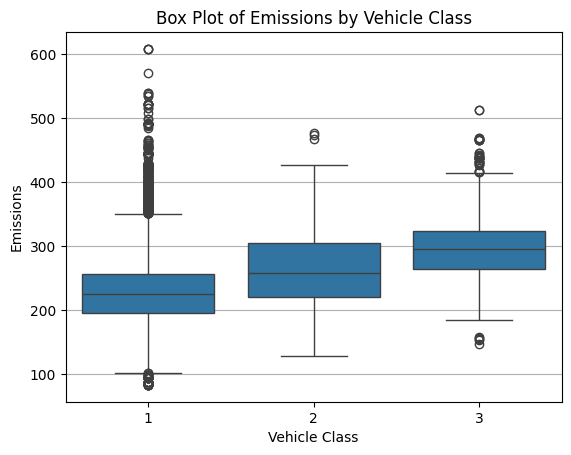

In [23]:
#- Box Plot (Vehicle class vs. Emissions)

sns.boxplot(x='CLASS NUMERIC', y='EMISSIONS', data=df)

plt.title('Box Plot of Emissions by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Emissions')

plt.grid(axis='y')
plt.show()

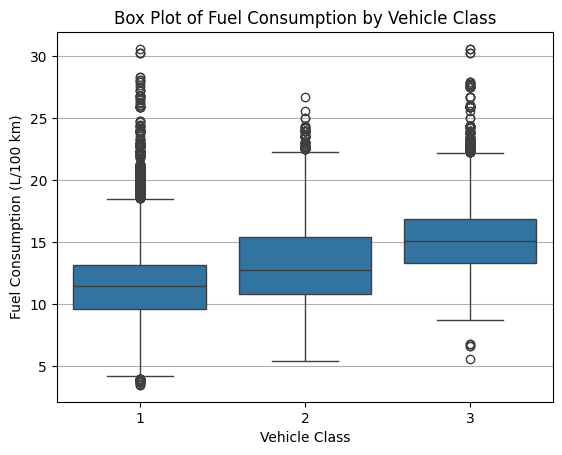

In [24]:
#- Box Plot (Class (buckets) vs. Fuel Consumption)

sns.boxplot(x='CLASS NUMERIC', y='FUEL CONSUMPTION', data=df)

plt.title('Box Plot of Fuel Consumption by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Fuel Consumption (L/100 km)')

plt.grid(axis='y')
plt.show()

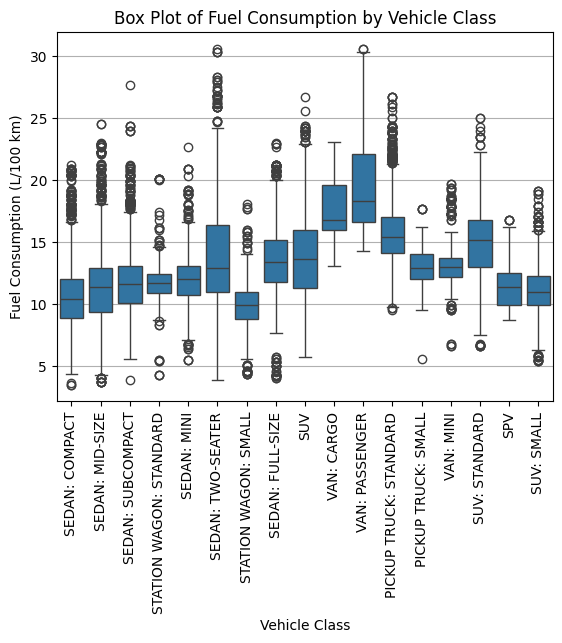

In [25]:
#- Box Plot (Vehicle class vs. Fuel Consumption)

sns.boxplot(x='VEHICLE CLASS', y='FUEL CONSUMPTION', data=df)

plt.title('Box Plot of Fuel Consumption by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Fuel Consumption (L/100 km)')

plt.grid(axis='y')
plt.xticks(rotation=90)
plt.show()

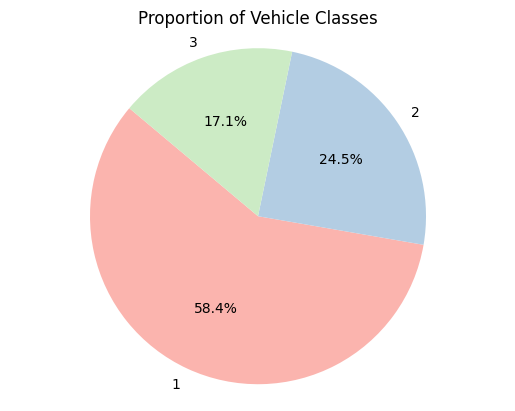

In [26]:
#- Pie chart (Vehicle class buckets)
counts = df['CLASS NUMERIC'].value_counts()

plt.pie(counts,
         labels=counts.index,
         autopct='%1.1f%%',
         startangle=140,
         colors=plt.cm.Pastel1.colors)  #- (This was my favorite color palette)

plt.title('Proportion of Vehicle Classes')

plt.axis('equal')
plt.show()

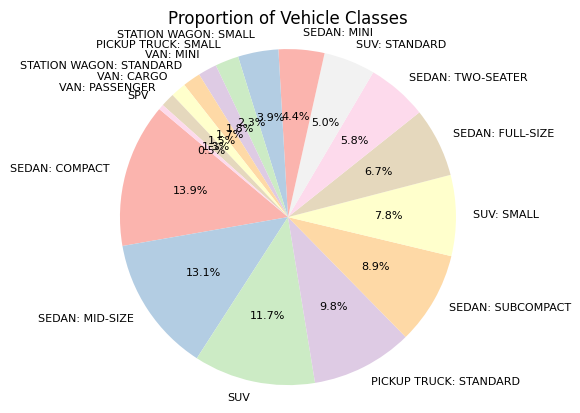

In [27]:
#- Pie chart (Each vehicle class)
counts = df['VEHICLE CLASS'].value_counts()

plt.pie(counts,
         labels=counts.index,
         autopct='%1.1f%%',
         startangle=140,
         colors=plt.cm.Pastel1.colors,
        textprops=dict(size=8)) #- I found this code on Google so reduce overlap

plt.title('Proportion of Vehicle Classes')

plt.axis('equal')
plt.show()

## 5. Supervised Machine Learning Model (Linear Regression)

The final section is dedicated to a multi-factor linear regression model. The data incurred a 20/80 split to train and test on. Additional error testing was performed. Finally, the coefficients were extracted to be depicted in a bar graph at the end of the section.

In [28]:
#- Establishing factors and train-test allocation
X = df[['ENGINE SIZE','CYLINDERS','COMB (mpg)','CLASS NUMERIC']]
y = df['FUEL CONSUMPTION']

X_train, X_test, y_train, y_test = train_test_split(
   X,
   y,
   test_size= 0.2,
   random_state=42)

#- Performing regression:
model = LinearRegression()
model.fit(X_train, y_train)
print('R-Squared (train)',model.score(X_train, y_train))
print('R-Squared (test)',model.score(X_test, y_test))

#-- Adjusted R-Squared
n = len(y)  # Number of samples
p = X.shape[1]  # Number of predictors
adj_r_squared = 1 - ((1 - model.score(X,y)) * (n - 1)) / (n - p - 1)

print(f"Adjusted R-squared: {adj_r_squared:.3f}")

#-- Model coefficients
coefficients = model.coef_
intercept = model.intercept_
print("Model coefficients:")
for feature, coef in zip(X, coefficients):
    print(f"{feature}: {coef:.3f}")
print(f"Intercept: {intercept:.3f}")

R-Squared (train) 0.8920317494008101
R-Squared (test) 0.8873835546660308
Adjusted R-squared: 0.891
Model coefficients:
ENGINE SIZE: 0.336
CYLINDERS: 0.364
COMB (mpg): -0.321
CLASS NUMERIC: 0.150
Intercept: 18.059


In [29]:
#- Additional Error Testing
X_test['predicted'] = model.predict(X_test)
X_test['actual'] = y_test

X_test["Error"] = X_test['predicted'] - X_test['actual']
X_test["MAE"] = X_test["Error"].abs()
X_test["RMSE"] = X_test["Error"] ** 2

print("Mean Absolute Error", X_test["MAE"].mean())
print("Root Mean Square Error", (X_test["RMSE"].mean())**(1/2))

Mean Absolute Error 0.7506370448527065
Root Mean Square Error 1.1667999040812616


In [30]:
#- Linear regression (just car make and year)
X = pd.get_dummies(df[['MAKE','YEAR']], drop_first=True)
y = df['FUEL CONSUMPTION']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.4056832884416308
0.38186979769751117


In [31]:
#-- Model coefficients
coefficients = model.coef_
intercept = model.intercept_

coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print("Intercept:", intercept)
print(coeff_df)

Intercept: 147.78628891654103
               Feature  Coefficient
6         MAKE_BUGATTI    17.208002
13        MAKE_FERRARI    10.560323
26    MAKE_LAMBORGHINI    10.387863
4         MAKE_BENTLEY     9.000454
41    MAKE_ROLLS-ROYCE     8.641645
46            MAKE_SRT     7.322842
2    MAKE_ASTON MARTIN     6.385462
30       MAKE_MASERATI     6.041832
19         MAKE_HUMMER     5.569189
17            MAKE_GMC     5.308643
27     MAKE_LAND ROVER     4.508983
40            MAKE_RAM     4.184477
12          MAKE_DODGE     4.117586
9       MAKE_CHEVROLET     3.346738
16        MAKE_GENESIS     3.201316
22          MAKE_ISUZU     3.174123
8        MAKE_CADILLAC     3.001601
32  MAKE_MERCEDES-BENZ     2.829577
15           MAKE_FORD     2.691916
29        MAKE_LINCOLN     2.493783
23         MAKE_JAGUAR     2.488215
37       MAKE_PLYMOUTH     2.149522
39        MAKE_PORSCHE     2.006252
5             MAKE_BMW     1.815444
24           MAKE_JEEP     1.815414
21       MAKE_INFINITI     1.75664

<ipython-input-32-550246715bd4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='coolwarm')


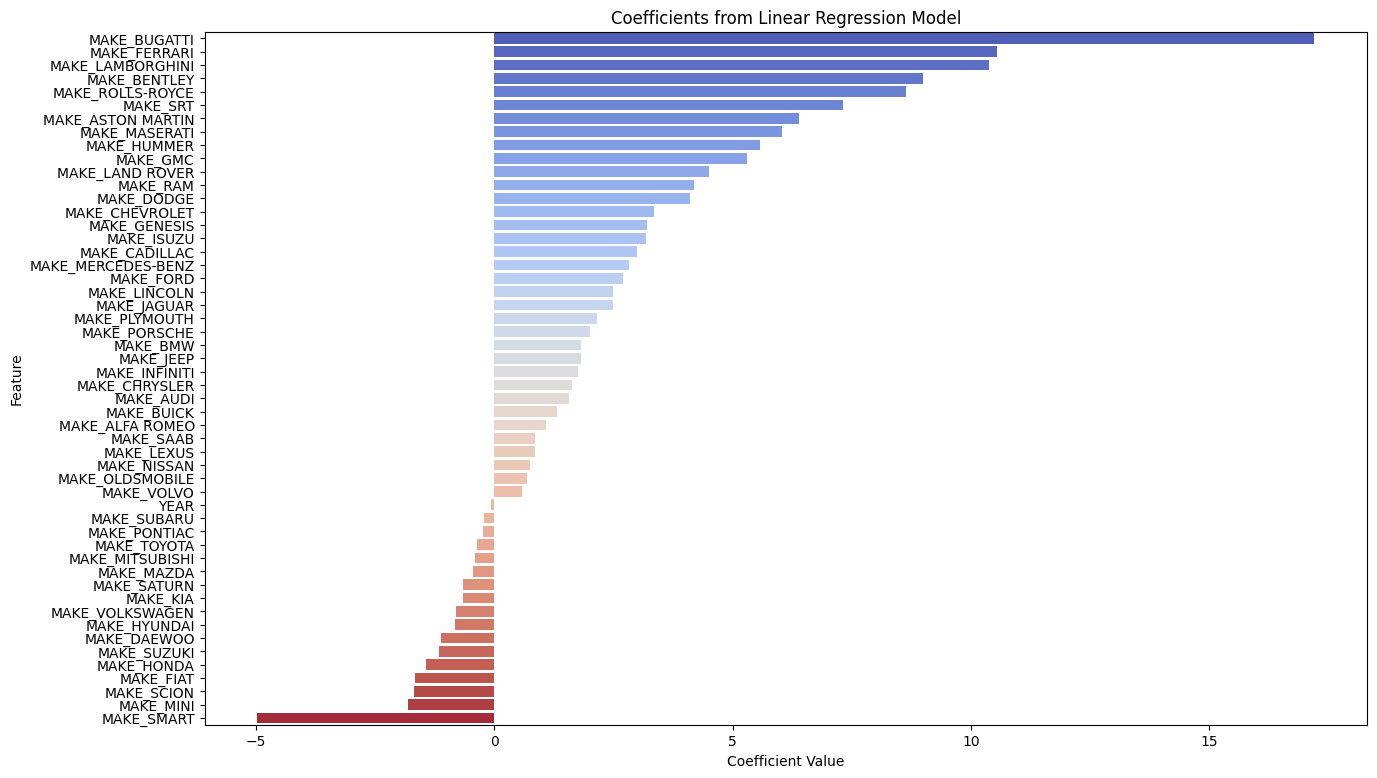

In [32]:
#-- Plotting the coefficients
plt.figure(figsize=(15,9))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='coolwarm')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients from Linear Regression Model')
plt.show()